In [1]:
import numpy as np
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
from sklearn.preprocessing import LabelEncoder, StandardScaler 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression 
from sklearn.ensemble import RandomForestClassifier 
from sklearn.svm import SVC 
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.naive_bayes import GaussianNB 
from sklearn.tree import plot_tree
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix, classification_report
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
sns.set()

Read in data and display head and shape

In [2]:
df=pd.read_csv('C:/Users/HP/Documents/NEU/thesis/Cleaned Data1.csv') 
print(df.shape)

(334, 31)


In [3]:
df.head()

,I am currently employed at least part-time,I identify as having a mental illness,Education,I have my own computer separate from a smart phone,I have been hospitalized before for my mental illness,How many days were you hospitalized for your mental illness,I am legally disabled,I have my regular access to the internet,I live with my parents,I have a gap in my resume,...,Obsessive thinking,Mood swings,Panic attacks,Compulsive behavior,Tiredness,Age,Gender,Household Income,Region,Device Type
0,0,0,High School or GED,0,0,0.0,0,1,0,1,...,1.0,0.0,1.0,0.0,0.0,30-44,Male,"$25,000-$49,999",Mountain,Android Phone / Tablet
1,1,1,Some Phd,1,0,0.0,0,1,0,0,...,0.0,0.0,1.0,0.0,1.0,18-29,Male,"$50,000-$74,999",East South Central,MacOS Desktop / Laptop
2,1,0,Completed Undergraduate,1,0,0.0,0,1,0,0,...,0.0,0.0,0.0,0.0,0.0,30-44,Male,"$150,000-$174,999",Pacific,MacOS Desktop / Laptop
3,0,0,Some Undergraduate,1,0,NaN,0,1,1,1,...,0.0,0.0,0.0,0.0,0.0,30-44,Male,"$25,000-$49,999",New England,Windows Desktop / Laptop
4,1,1,Completed Undergraduate,1,1,35.0,1,1,0,1,...,1.0,1.0,1.0,1.0,1.0,30-44,Male,"$25,000-$49,999",East North Central,iOS Phone / Tablet


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 334 entries, 0 to 333
Data columns (total 31 columns):
 #   Column                                                        Non-Null Count  Dtype  
---  ------                                                        --------------  -----  
 0   I am currently employed at least part-time                    334 non-null    int64  
 1   I identify as having a mental illness                         334 non-null    int64  
 2   Education                                                     334 non-null    object 
 3   I have my own computer separate from a smart phone            334 non-null    int64  
 4   I have been hospitalized before for my mental illness         334 non-null    int64  
 5   How many days were you hospitalized for your mental illness   297 non-null    float64
 6   I am legally disabled                                         334 non-null    int64  
 7   I have my regular access to the internet                      334 non-n

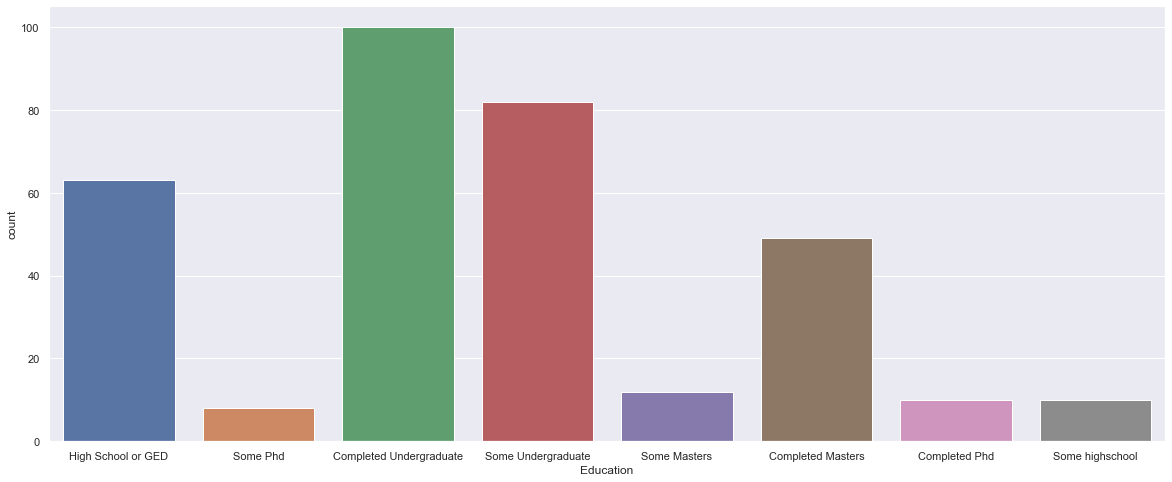

In [5]:
# Set figure size
plt.figure(figsize=(20, 8))

# Make a countplot of education levels
sns.countplot(df['Education'])

# Display the figure
plt.savefig('education_countplot.png', format='png')
plt.show()


In [6]:
# We can check the distribution of values in the 'I identify as having a mental illness' column
# with the value_counts() function
print(df['I identify as having a mental illness'].value_counts())

0    254
1     80
Name: I identify as having a mental illness, dtype: int64


In the code you provided, the value 0 corresponds to individuals who do not identify as having a mental illness
...and the value 1 corresponds to individuals who do identify as having a mental illness.

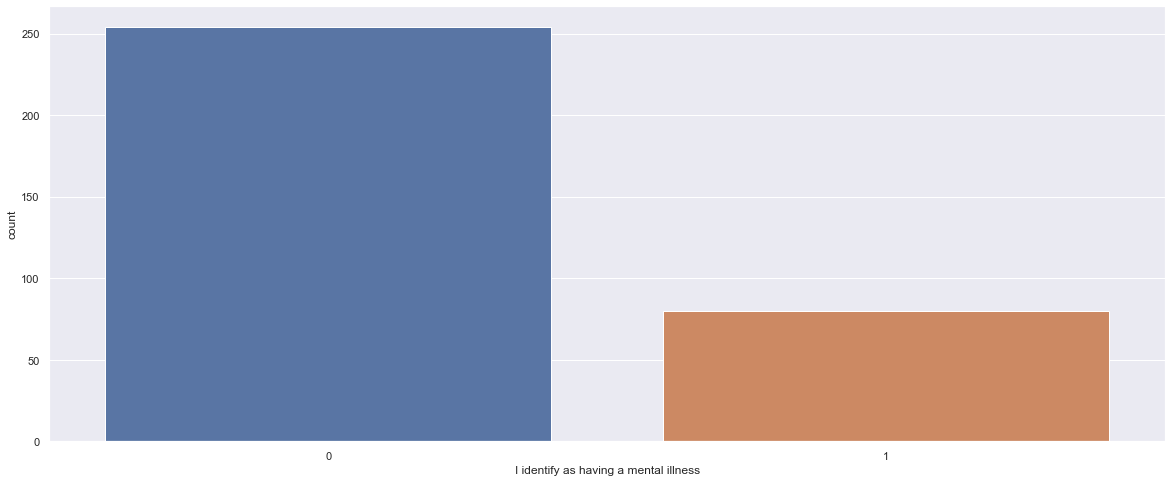

In [7]:
# Use seaborn's countplot to show the distribution of mental illness status
# Set figure size
plt.figure(figsize=(20, 8))
sns.countplot(df['I identify as having a mental illness'])
plt.show()

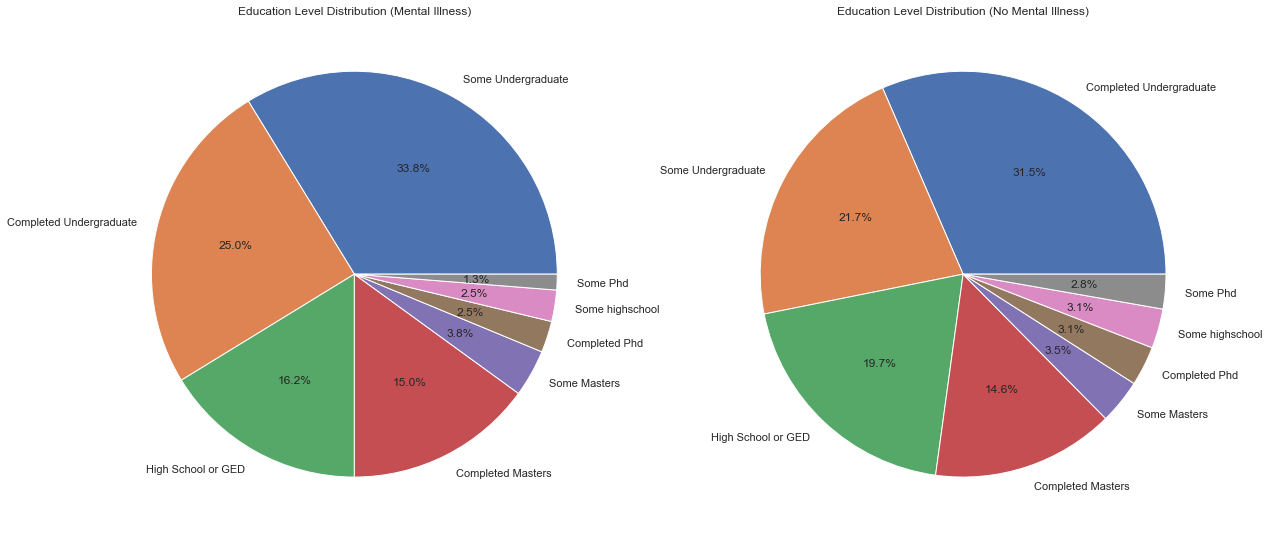

In [8]:
# Set figure size
plt.figure(figsize=(20, 15))

# Create a pie chart of the education level distribution for people with mental illness
plt.subplot(1, 2, 1)
df_ill = df[df['I identify as having a mental illness'] == 1]
education_counts_ill = df_ill['Education'].value_counts()
plt.pie(education_counts_ill, labels=education_counts_ill.index, autopct='%1.1f%%')
plt.title('Education Level Distribution (Mental Illness)')

# Create a pie chart of the education level distribution for people without mental illness
plt.subplot(1, 2, 2)
df_no_ill = df[df['I identify as having a mental illness'] == 0]
education_counts_no_ill = df_no_ill['Education'].value_counts()
plt.pie(education_counts_no_ill, labels=education_counts_no_ill.index, autopct='%1.1f%%')
plt.title('Education Level Distribution (No Mental Illness)')

# Display the figure
plt.show()


In [9]:
# We can use the describe() function to get some summary statistics for the 'Total Annual Income' column
print(df[df['I identify as having a mental illness'] == 0]['Annual income (including any social welfare programs) in USD'].describe())
print(df[df['I identify as having a mental illness'] == 1]['Annual income (including any social welfare programs) in USD'].describe())

count    254.000000
mean      38.570866
std       31.016521
min        0.000000
25%       13.250000
50%       33.000000
75%       56.000000
max      100.000000
Name: Annual income (including any social welfare programs) in USD, dtype: float64
count     80.000000
mean      33.787500
std       29.354962
min        0.000000
25%       12.000000
50%       24.000000
75%       50.000000
max      100.000000
Name: Annual income (including any social welfare programs) in USD, dtype: float64


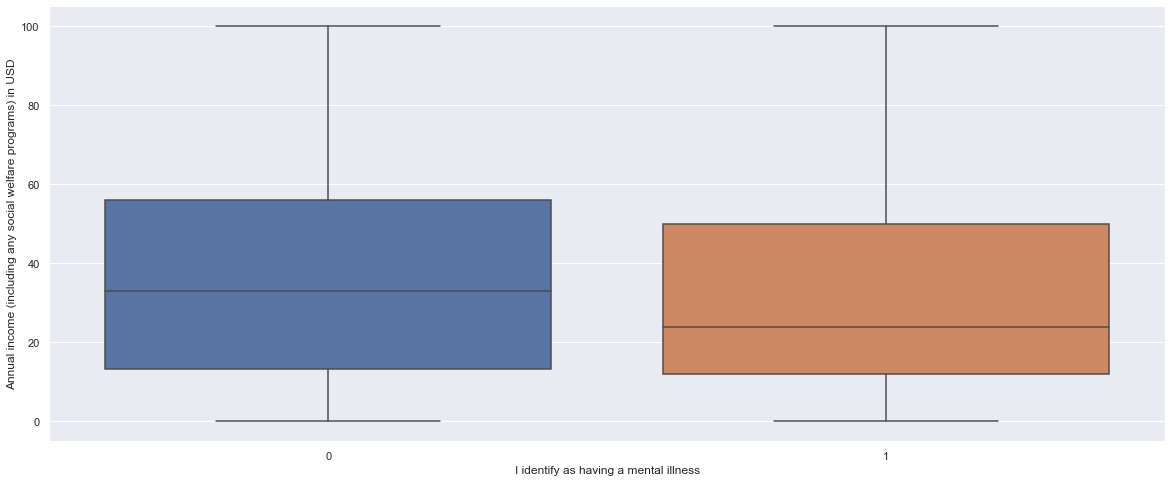

In [10]:
# Use seaborn's boxplot to compare the distributions of annual income for people with and without mental illness
# Set figure size
plt.figure(figsize=(20, 8))
sns.boxplot(x='I identify as having a mental illness', y='Annual income (including any social welfare programs) in USD', data=df)
plt.show()

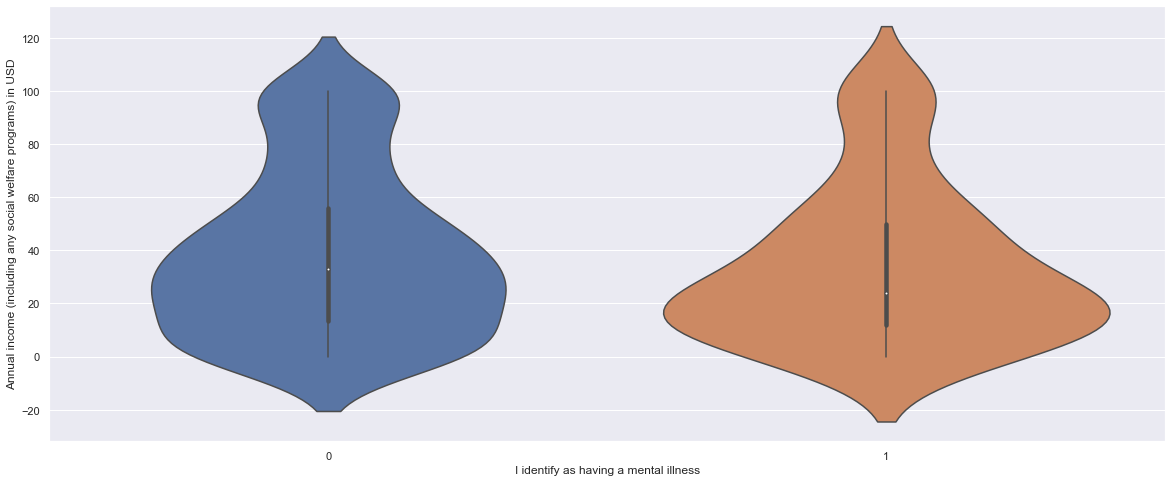

In [11]:
# Use seaborn's violinplot to compare the distributions of annual income for people with and without mental illness
# Set figure size
plt.figure(figsize=(20, 8))
sns.violinplot(x='I identify as having a mental illness', y='Annual income (including any social welfare programs) in USD', data=df)
plt.show()

explore the relationship between unemployment and each of the mental health issues

Panic attacks 0.4897959183673469
Obsessive thinking 0.42857142857142855
Mood swings 0.42105263157894735
Depression 0.38372093023255816
Anxiety 0.37
Lack of concentration 0.35294117647058826
Compulsive behavior 0.3103448275862069
Tiredness 0.3


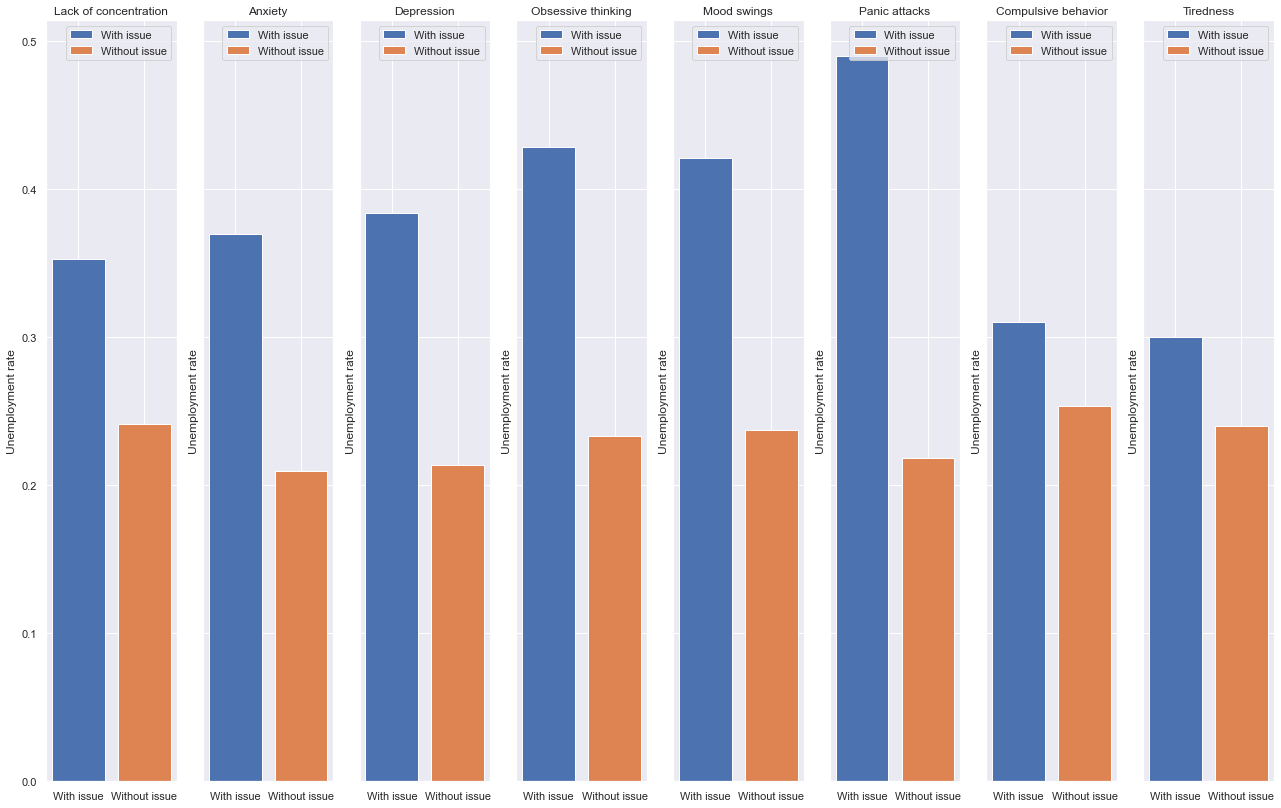

In [12]:
# Create a list of mental health issues
issues = ['Lack of concentration', 'Anxiety', 'Depression', 'Obsessive thinking', 'Mood swings', 'Panic attacks', 'Compulsive behavior', 'Tiredness']

# Create a figure with a subplot for each mental health issue
fig, axs = plt.subplots(figsize=(22,14), ncols=8, nrows=1, sharex=True, sharey=True)

# Create an empty list to store the unemployment rates
unemployment_rates = []

# Loop through the mental health issues
for ax, issue in zip(axs.flat, issues):
    # Calculate the unemployment rate for people with and without the issue
    with_issue = df[df[issue] == 1]['I am unemployed'].mean()
    without_issue = df[df[issue] == 0]['I am unemployed'].mean()
    
    # Make a bar chart comparing the unemployment rates
    ax.bar(0, with_issue, label='With issue')
    ax.bar(1, without_issue, label='Without issue')
    ax.set_xticks([0, 1], ['With issue', 'Without issue'])
    ax.set_ylabel('Unemployment rate')
    ax.set_title(issue)
    ax.legend()
    
    # Add the unemployment rate to the list
    unemployment_rates.append((issue, with_issue))

# Sort the list of unemployment rates in descending order
unemployment_rates.sort(key=lambda x: x[1], reverse=True)

# Print the mental health issues in order of highest to lowest unemployment rate
for issue, rate in unemployment_rates:
    print(issue, rate)

# Display the figure
plt.show()


 Exploring the relationship between gender and unemployment for people with mental health issues

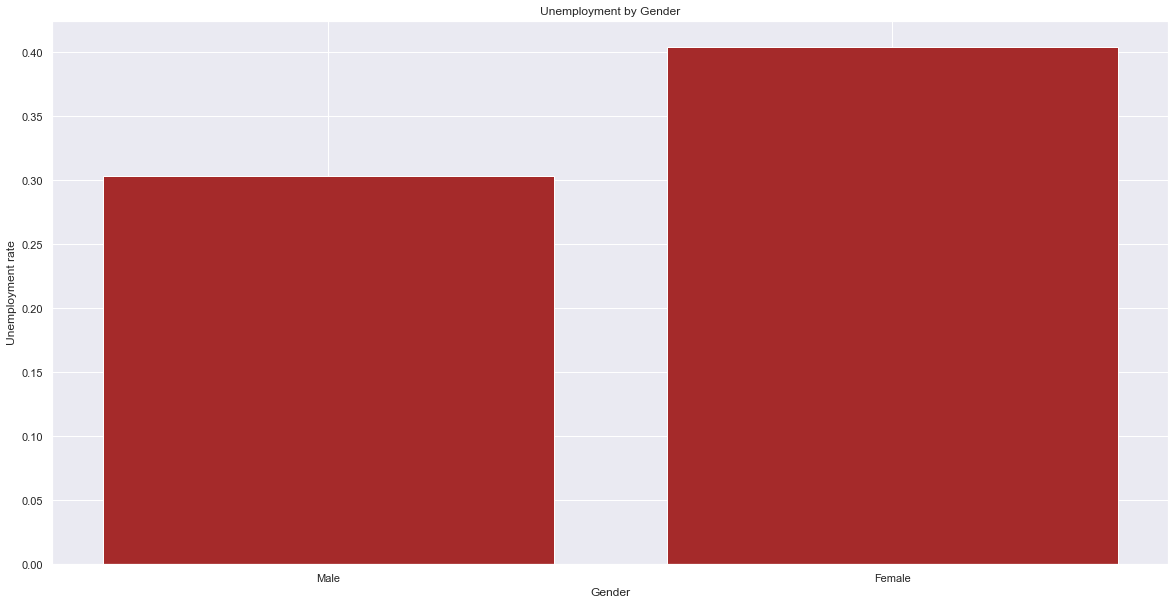

In [14]:
# Calculate the unemployment rates for males and females with mental health issues
male_unemployment = df[(df['I identify as having a mental illness'] == 1) & (df['Gender'] == 'Male')]['I am unemployed'].mean()
female_unemployment = df[(df['I identify as having a mental illness'] == 1) & (df['Gender'] == 'Female')]['I am unemployed'].mean()

# Make a bar chart of the unemployment rates by gender
plt.figure(figsize=(20, 10))
plt.bar(['Male', 'Female'], [male_unemployment, female_unemployment], color='brown')
plt.xlabel('Gender')
plt.ylabel('Unemployment rate')
plt.title('Unemployment by Gender')
plt.show()


In [15]:
print(male_unemployment)
print(female_unemployment)

0.30303030303030304
0.40425531914893614


In [16]:
df['Education'].unique()

array(['High School or GED', 'Some Phd', 'Completed Undergraduate',
       'Some Undergraduate', 'Some\xa0Masters', 'Completed Masters',
       'Completed Phd', 'Some highschool'], dtype=object)

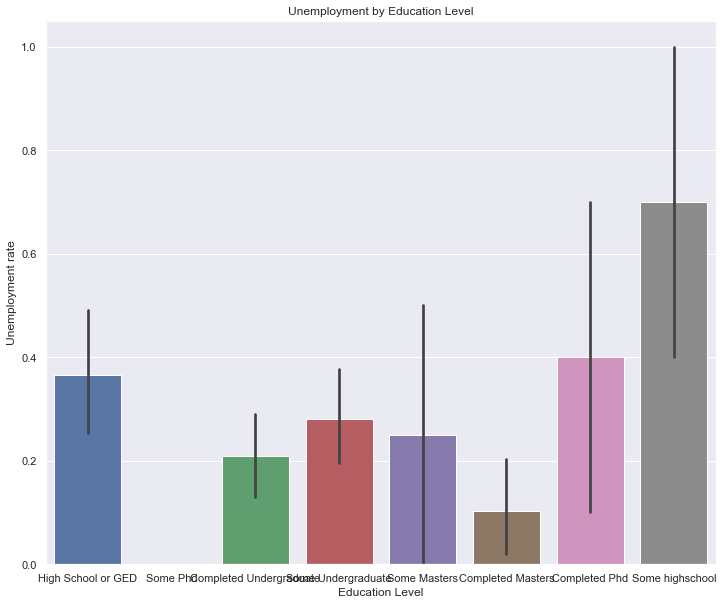

In [17]:
# Calculate the unemployment rates for different education levels
high_school_unemployment = df[df['Education'] == 'High School or GED']['I am unemployed'].mean()
some_phd_unemployment = df[df['Education'] == 'Some Phd']['I am unemployed'].mean()
undergraduate_unemployment = df[df['Education'] == 'Completed Undergraduate']['I am unemployed'].mean()
some_undergraduate_unemployment = df[df['Education'] == 'Some Undergraduate']['I am unemployed'].mean()
masters_unemployment = df[df['Education'] == 'Completed Masters']['I am unemployed'].mean()
some_masters_unemployment = df[df['Education'] == 'Some Masters']['I am unemployed'].mean()
phd_unemployment = df[df['Education'] == 'Completed Phd']['I am unemployed'].mean()
some_highschool_unemployment = df[df['Education'] == 'Some highschool']['I am unemployed'].mean()

# Set figure size
plt.figure(figsize=(12, 10))

# Make a bar chart of the unemployment rates by education level using seaborn
sns.barplot(x='Education', y='I am unemployed', data=df, capsize=0)
plt.xlabel('Education Level')
plt.ylabel('Unemployment rate')
plt.title('Unemployment by Education Level')

# Display the figure
plt.show()


Calculate correlations and plot heatmap




<Axes:>

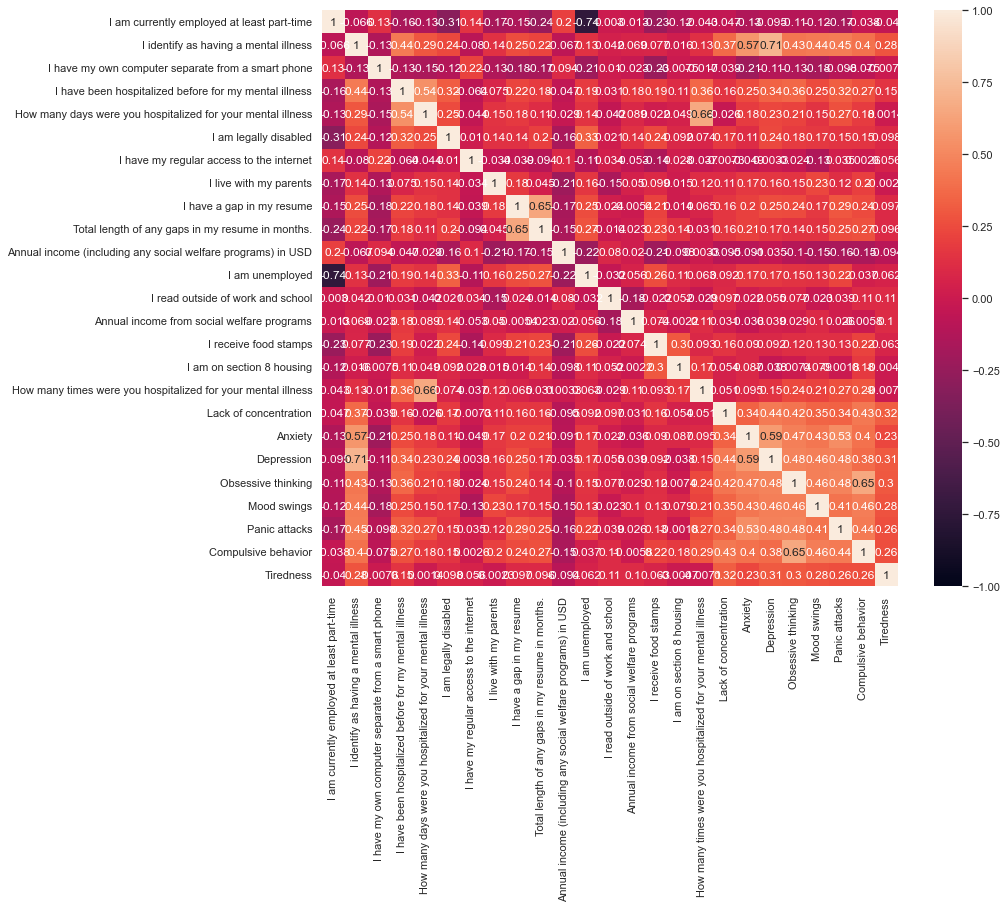

In [18]:
cor=df.corr() 
fig = plt.figure(figsize=(10,8)) 
fig.add_axes([0,0,1,1])
ax = fig.get_axes()[0] 
sns.heatmap(cor, ax=ax, vmin=-1, vmax=1, annot=True)

In [19]:
# Calculate the correlations between the "I identify as having a mental illness" column and all other columns
correlations = df.corr()['I identify as having a mental illness']

# Display the correlations
print(correlations)


I am currently employed at least part-time                     -0.065718
I identify as having a mental illness                           1.000000
I have my own computer separate from a smart phone             -0.125679
I have been hospitalized before for my mental illness           0.439156
How many days were you hospitalized for your mental illness     0.291421
I am legally disabled                                           0.237348
I have my regular access to the internet                       -0.080127
I live with my parents                                          0.137187
I have a gap in my resume                                       0.250350
Total length of any gaps in my resume in months.                0.219437
Annual income (including any social welfare programs) in USD   -0.066703
I am unemployed                                                 0.134788
I read outside of work and school                               0.041625
Annual income from social welfare programs         

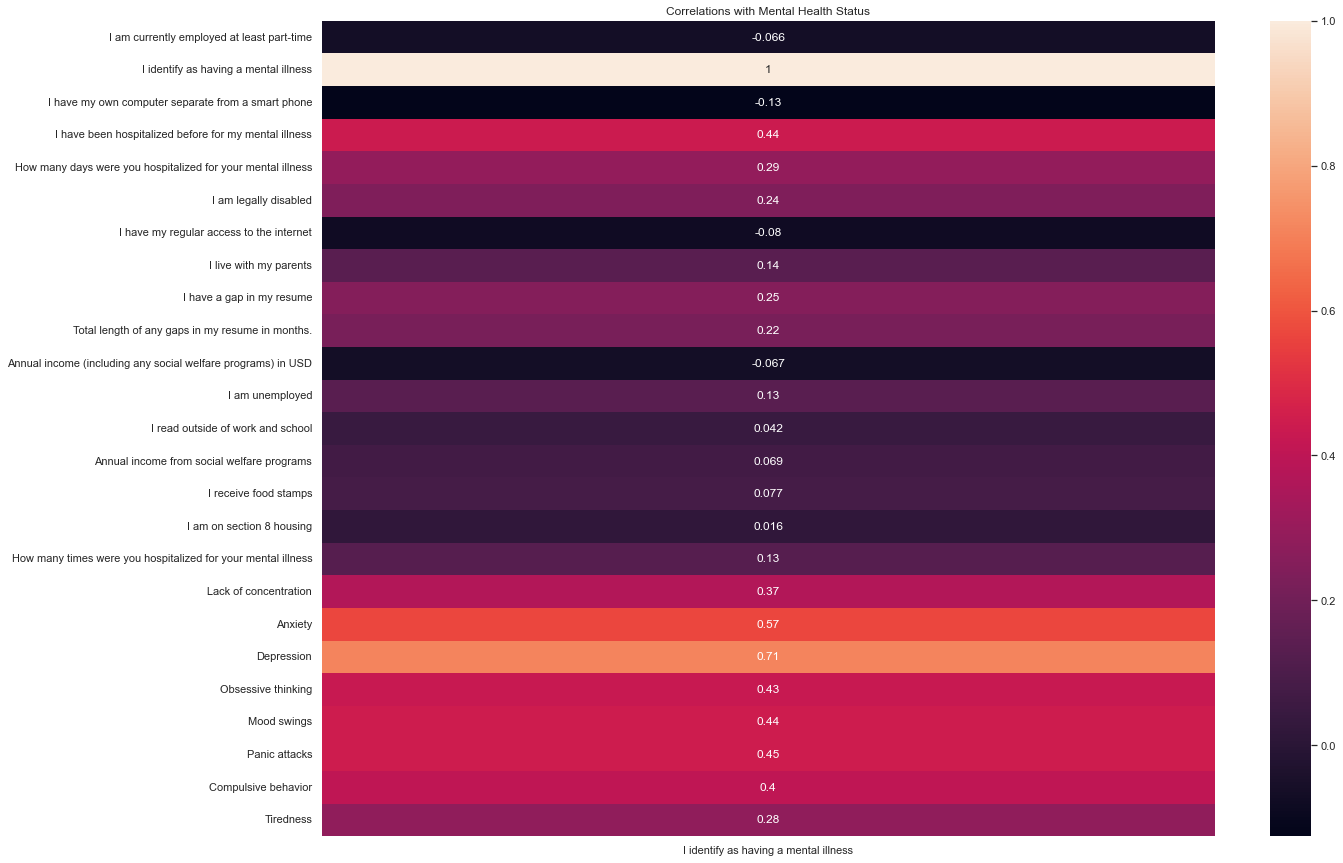

In [20]:
# Calculate the correlations between the "I identify as having a mental illness" column and all other columns
correlations = df.corr()['I identify as having a mental illness']

# Set figure size
plt.figure(figsize=(20, 15))

# Create a heatmap of the correlations
sns.heatmap(correlations.to_frame(), annot=True)

# Add a title to the heatmap
plt.title('Correlations with Mental Health Status')

# Display the heatmap
plt.show()

MACHINE LEARNING

In [21]:
columns_to_drop=['Region','I am currently employed at least part-time','I am on section 8 housing','I receive food stamps','Annual income from social welfare programs','I have a gap in my resume','Total length of any gaps in my resume in\xa0months.','Household Income','Device Type']

In [22]:
df.drop(columns=columns_to_drop,inplace=True)

In [74]:
# Label encode the categorical columns
le_educatio=LabelEncoder() 
le_age=LabelEncoder() 
le_gender=LabelEncoder() 
df['Education']=le_educatio.fit_transform(df['Education']) 
df['Age']=le_age.fit_transform(df['Age']) 
df['Gender']=le_gender.fit_transform(df['Gender'])

In [75]:
X = df[['Lack of concentration', 'Anxiety', 'Depression', 'Obsessive thinking', 'Mood swings', 'Panic attacks', 'Compulsive behavior', 'Tiredness', 'Age', 'Gender', 'Education']]
y = df['I am unemployed']

In [78]:
X = X.fillna(X.median())

In [79]:
df.head()

,I identify as having a mental illness,Education,I have my own computer separate from a smart phone,I have been hospitalized before for my mental illness,How many days were you hospitalized for your mental illness,I am legally disabled,I have my regular access to the internet,I live with my parents,Annual income (including any social welfare programs) in USD,I am unemployed,...,Lack of concentration,Anxiety,Depression,Obsessive thinking,Mood swings,Panic attacks,Compulsive behavior,Tiredness,Age,Gender
0,0,3,0,0,0.0,0,1,0,35,1,...,1.0,1,1,1.0,0.0,1.0,0.0,0.0,1,1
1,1,4,1,0,0.0,0,1,0,22,0,...,1.0,1,1,0.0,0.0,1.0,0.0,1.0,0,1
2,0,2,1,0,0.0,0,1,0,100,0,...,0.0,0,0,0.0,0.0,0.0,0.0,0.0,1,1
3,0,5,1,0,NaN,0,1,1,0,1,...,0.0,0,0,0.0,0.0,0.0,0.0,0.0,1,1
4,1,2,1,1,35.0,1,1,0,32,0,...,1.0,1,1,1.0,1.0,1.0,1.0,1.0,1,1


In [80]:
# Standardize the data
ss = StandardScaler()
X = ss.fit_transform(X)

In [94]:
# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [95]:
# Import OneHotEncoder
from sklearn.preprocessing import OneHotEncoder

# Create an instance of the OneHotEncoder class
one_hot_encoder = OneHotEncoder(handle_unknown='ignore')

# Use the fit_transform method to apply one-hot encoding to your categorical data
X_one_hot = one_hot_encoder.fit_transform(X)

# You can access the one-hot encoded data as a NumPy array using the toarray method
X_one_hot = X_one_hot.toarray()


Create and fit Logistic Regression model



In [96]:
lr=LogisticRegression() 
lr.fit(X_train,y_train) 
y_pred=lr.predict(X_test) 
print("Accuracy score for Logistic Regression:",accuracy_score(y_test,y_pred))

Accuracy score for Logistic Regression: 0.900990099009901


Create and fit Random Forest model



In [97]:
# Fit the model and make predictions
model = RandomForestClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print(f'Accuracy: {accuracy_score(y_test, y_pred)}')

Accuracy: 0.8811881188118812


Create and fit SVM model


In [98]:
svm=SVC() 
svm.fit(X_train,y_train) 
y_pred=svm.predict(X_test) 
print("Accuracy score for SVM:",accuracy_score(y_test,y_pred))


Accuracy score for SVM: 0.9108910891089109


Create and fit KNN model



In [99]:
knn=KNeighborsClassifier() 
knn.fit(X_train,y_train) 
y_pred=knn.predict(X_test) 
print("Accuracy score for KNN:",accuracy_score(y_test,y_pred))

Accuracy score for KNN: 0.8910891089108911


Create and fit Naive Bayes model



In [100]:
nb=GaussianNB() 
nb.fit(X_train,y_train) 
y_pred=nb.predict(X_test) 
print("Accuracy score for Naive Bayes:",accuracy_score(y_test,y_pred))

Accuracy score for Naive Bayes: 0.8712871287128713


In [101]:
#Compare results in table format
results={'Model':['Logistic Regression','Random Forest','SVM','KNN','Naive Bayes'],'Accuracy Score':[accuracy_score(y_test,y_pred) 
for y_pred in [lr.predict(X_test),model.predict(X_test),svm.predict(X_test),knn.predict(X_test),nb.predict(X_test)]]} 
results_df=pd.DataFrame(results) 
print(results_df)


                 Model  Accuracy Score
0  Logistic Regression        0.900990
1        Random Forest        0.881188
2                  SVM        0.910891
3                  KNN        0.891089
4          Naive Bayes        0.871287


In [102]:
#Display the model with the highest accuracy score
best_model=results_df.loc[results_df['Accuracy Score'].idxmax()]['Model'] 
print("The best model is:",best_model)


The best model is: SVM


In [103]:
#Create and fit decision tree model
from sklearn.tree import DecisionTreeClassifier

dt=DecisionTreeClassifier() 
dt.fit(X_train,y_train) 
y_pred=dt.predict(X_test) 
print("Accuracy score for Decision Tree:",accuracy_score(y_test,y_pred))


Accuracy score for Decision Tree: 0.8118811881188119


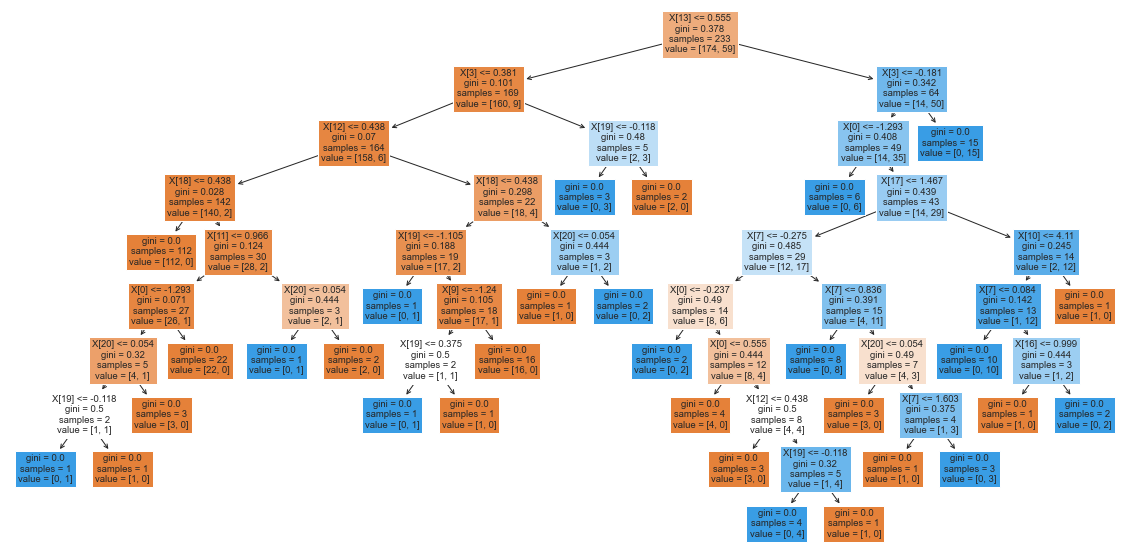

In [104]:
from sklearn.tree import plot_tree

plt.figure(figsize=(20,10))
plot_tree(dt, filled=True);



In [105]:
#Display results (accuracy score, precision score, recall score and F1 score) in table format
results={'Model':['Logistic Regression','Random Forest','SVM','KNN','Naive Bayes'],
'Accuracy Score':[accuracy_score(y_test, y_pred) for y_pred in [lr.predict(X_test), model.predict(X_test), svm.predict(X_test), knn.predict(X_test), nb.predict(X_test)]],
'Precision Score':[precision_score(y_test, y_pred) for y_pred in [lr.predict(X_test), model.predict(X_test), svm.predict(X_test), knn.predict(X_test), nb.predict(X_test)]],
'Recall Score':[recall_score(y_test, y_pred) for y_pred in [lr.predict(X_test), model.predict(X_test), svm.predict(X_test), knn.predict(X_test), nb.predict(X_test)]],
'F1 Score':[f1_score(y_test, y_pred) for y_pred in [lr.predict(X_test), model.predict(X_test), svm.predict(X_test), knn.predict(X_test), nb.predict(X_test)]]}
results_df=pd.DataFrame(results)
print(results_df)

                 Model  Accuracy Score  Precision Score  Recall Score  \
0  Logistic Regression        0.900990         0.761905      0.761905   
1        Random Forest        0.881188         0.736842      0.666667   
2                  SVM        0.910891         0.730769      0.904762   
3                  KNN        0.891089         0.916667      0.523810   
4          Naive Bayes        0.871287         0.666667      0.761905   

   F1 Score  
0  0.761905  
1  0.700000  
2  0.808511  
3  0.666667  
4  0.711111  


In [106]:
results_df

,Model,Accuracy Score,Precision Score,Recall Score,F1 Score
0,Logistic Regression,0.900990,0.761905,0.761905,0.761905
1,Random Forest,0.881188,0.736842,0.666667,0.700000
2,SVM,0.910891,0.730769,0.904762,0.808511
3,KNN,0.891089,0.916667,0.523810,0.666667
4,Naive Bayes,0.871287,0.666667,0.761905,0.711111


In [107]:
# Get the predictions for the test data
y_pred = svm.predict(X_test)

# Get the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Print the confusion matrix
print(cm)


[[73  7]
 [ 2 19]]


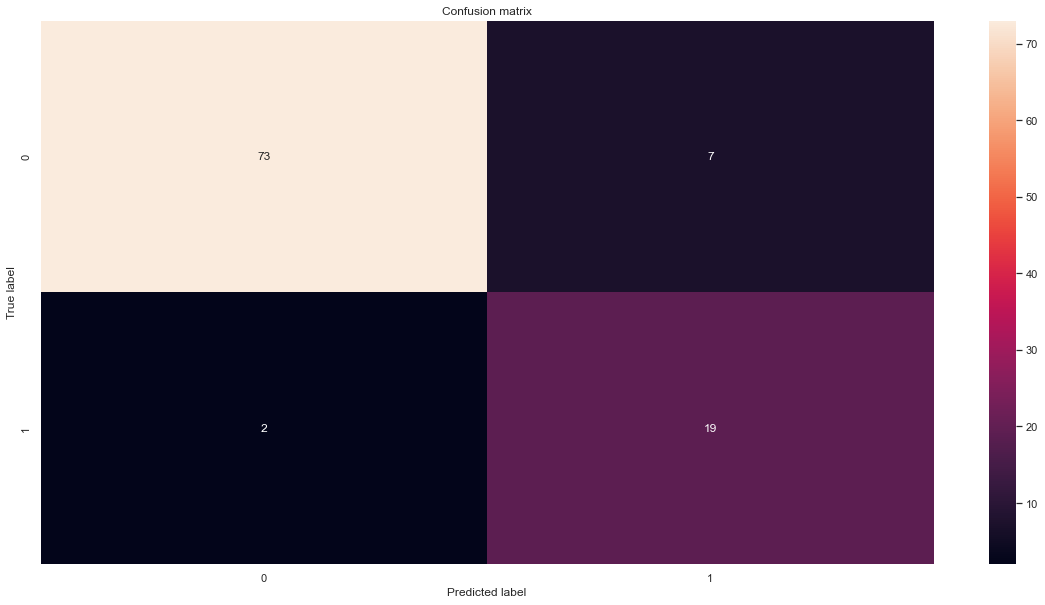

In [108]:
# Calculate predictions
y_pred = svm.predict(X_test)

# Calculate and plot confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(20,10))
sns.heatmap(cm, annot=True, fmt='d')
plt.title('Confusion matrix')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()


In [109]:
# Find the model with the highest accuracy score
best_model = results_df.sort_values('Accuracy Score', ascending=False).iloc[0]['Model']

# Make predictions on the entire dataset using the best model
if best_model == 'Logistic Regression':
  y_pred = lr.predict(X)
elif best_model == 'Random Forest':
  y_pred = model.predict(X)
elif best_model == 'SVM':
  y_pred = svm.predict(X)
elif best_model == 'KNN':
  y_pred = knn.predict(X)
elif best_model == 'Naive Bayes':
  y_pred = nb.predict(X)
elif best_model == 'Decision Tree':
  y_pred = dt.predict(X)

# Print the predictions
print(y_pred)


[1 1 0 0 1 0 0 1 1 1 0 1 1 0 1 0 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1
 0 0 1 1 0 0 0 0 0 0 1 0 1 1 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0
 0 0 1 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0 0 1 1 0 0 0 1 0 0 1 0 0 0 0 1 1 0
 0 0 0 0 1 0 0 0 1 0 0 1 0 0 1 0 0 0 0 1 0 0 1 0 0 1 1 0 1 0 0 0 1 0 0 0 0
 0 0 1 0 0 1 0 1 0 0 1 0 0 0 0 1 0 1 1 0 0 1 0 1 1 0 0 1 1 1 0 0 0 0 1 1 0
 1 1 0 0 0 0 0 1 0 1 0 0 0 1 1 0 1 1 1 0 1 1 0 0 0 1 0 1 1 0 0 0 0 0 0 0 1
 1]
